# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
%matplotlib inline

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [3]:
DATA_FOLDER = './data/'

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

- By studying the data we decided to only choose the confirmed cases and deaths. The reason herefor is that there is no way to know, if a patient who is previously registered as a suspected case, gets counted again when his illness is confirmed to be ebola. Analogous for the deaths, maybe one day a death gets registered as potentially ebola and days later after more thorough medical analysis it is confirmed to have been ebola, so another death gets counted in the confirmed cases. We did not want this to occur.



1. Create new Data Frame with wanted attributes
2. Provide functions that reads all csvs from a given directory
3. Append wanted attributes to new data frame (only confirmed)
4. Group data by Month and country and calculate the mean on the other fields.

# ASSUMPTIONS
...
# EXECUTION

In [143]:
ebola = pd.DataFrame(columns=['Month', 'Country', 'New', 'Deaths'])
ebola['Month'] = ebola['Month'].astype(np.int64)
ebola['New'] = ebola['New'].astype(np.int64)
ebola['Deaths'] = ebola['Deaths'].astype(np.int64)

def ebola_dirs(dirname, country, desc_col, totals_col, new_id, deaths_id):
    global ebola
    
    path = DATA_FOLDER + 'ebola/' + dirname
    old_sierra = 0
    for csv in sorted(os.listdir(path)):
        frame = pd.read_csv(path + '/' + csv)
        
        if country == 'Liberia' and '2014-12' in csv:
            continue
        
        deaths_id_mod = deaths_id
        if country == 'Guinea' and csv == '2014-08-04.csv':
            deaths_id_mod += ' today'
                        
        if (frame[frame[desc_col] == deaths_id_mod][totals_col].isnull().bool() or
            frame[frame[desc_col] == new_id][totals_col].isnull().bool()):
            continue

        month = parse(frame[frame.columns[0]][0]).month
        new = frame[frame[desc_col] == new_id][totals_col].astype(np.int64)
        
        deaths = 0
        if country == 'Sierra Leone':
            deaths1 = frame[frame[desc_col] == deaths_id_mod][totals_col].astype(np.int64).item()
            if deaths1 != 0:
                deaths = deaths1 - old_sierra
                old_sierra = deaths1
            else:
                deaths = 0
        else:
            deaths = frame[frame[desc_col] == deaths_id_mod][totals_col].astype(np.int64)
        
        row = pd.DataFrame({'Month': month, 'Country': country, 'New': new.values, 'Deaths': deaths})
        ebola = ebola.append(row, ignore_index=True)

ebola_dirs('guinea_data/', 'Guinea', 'Description', 'Totals', 'New cases of confirmed', 'New deaths registered')
ebola_dirs('liberia_data/', 'Liberia', 'Variable', 'National', 'New case/s (confirmed)', 'Newly reported deaths')
ebola_dirs('sl_data/', 'Sierra Leone', 'variable', 'National', 'new_confirmed', 'death_confirmed')

ebola.groupby(['Month', 'Country']).agg({'New': np.mean, 'Deaths': [np.mean, np.size]})

New     Deaths     
                         mean       mean size
Month Country                                
6     Liberia        2.142857   2.000000    7
7     Liberia        1.818182   4.272727   11
8     Guinea        12.400000   3.400000    5
      Liberia        5.444444  23.222222    9
      Sierra Leone  20.611111  21.500000   18
9     Guinea        13.000000   3.562500   16
      Liberia        6.217391  37.608696   23
      Sierra Leone  36.962963   6.037037   27
10    Guinea         6.000000  15.000000    1
      Liberia        1.619048  27.666667   21
      Sierra Leone  56.714286  18.571429   28
11    Liberia        7.333333  14.333333    3
      Sierra Leone  66.210526  22.421053   19
12    Sierra Leone  54.333333  57.666667    3

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

For each excel file, we:
    - Read the excel file into a pandas data frame
    - Name the columns and append a new Barcode column to it, where every entry is the name of the current file
    - Append this data frame to the rna data frame collecting the data of all 10 files
    
Then read the meta excel file into a data frame and do an inner join with the rna data frame on the "BARCODE" column. We replaced all the NaN values with "unknown" and create a unique index.

# ASSUMPTIONS
...
# EXECUTION

In [54]:
# Task 2

rna = pd.DataFrame()

for i in range(1, 10):
    file = 'MID' + str(i)
    frame = pd.read_excel(DATA_FOLDER + '/microbiome/' + file + '.xls')
    frame.columns = ['TYPE', 'NUMBER']
    frame['BARCODE'] = file
    frame.index = list(map(lambda n: file + '_' + str(n), np.arange(1, len(frame)+1)))
    rna = pd.concat([rna, frame])
    
meta = pd.read_excel(DATA_FOLDER + '/microbiome/metadata.xls', index_col=0)

rna.join(meta, on="BARCODE").drop('BARCODE', axis=1).fillna('unknown')

,TYPE,NUMBER,GROUP,SAMPLE
MID1_1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,EXTRACTION CONTROL,unknown
MID1_2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,EXTRACTION CONTROL,unknown
MID1_3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,EXTRACTION CONTROL,unknown
MID1_4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,EXTRACTION CONTROL,unknown
MID1_5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
MID1_6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
MID1_7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
MID1_8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
MID1_9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,EXTRACTION CONTROL,unknown
MID1_10,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",4,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [162]:
titanic = pd.read_excel(DATA_FOLDER + '/titanic.xls')

### 3.1

| Attribute     | Type     | Range         | Categorical     |
|---------------|----------|---------------|-----------------|
|pclass         |int64     |[1, 3]         |Yes              |
|survived       |int64     |[0, 1]         |Yes              |
|name           |object    |-              |No               |
|sex            |object    |{male, female} |Yes              |
|age            |float64   |[0.1667, 80.0] |No               |
|sibsp          |int64     |[0, 8]         |No               |
|parch          |int64     |[0, 9]         |No               |
|ticket         |object    |-              |Yes              |
|fare           |float64   |[0.0, 512.33]  |No               |
|cabin          |object    |-              |Yes              |
|embarked       |object    |{S, C, Q}      |Yes              |
|boat           |object    |-              |Yes              |
|body           |float64   |[1.0, 328.0]   |No               |
|home.dest      |object    |-              |No               |

In [163]:
titanic.pclass = titanic.pclass.astype('category')
#titanic.survived = titanic.survived.astype('category')
titanic.ticket = titanic.ticket.astype('category')
titanic.cabin = titanic.cabin.astype('category')
titanic.sex = titanic.sex.astype('category')
titanic.boat = titanic.boat.astype('category')
titanic.embarked = titanic.embarked.astype('category')

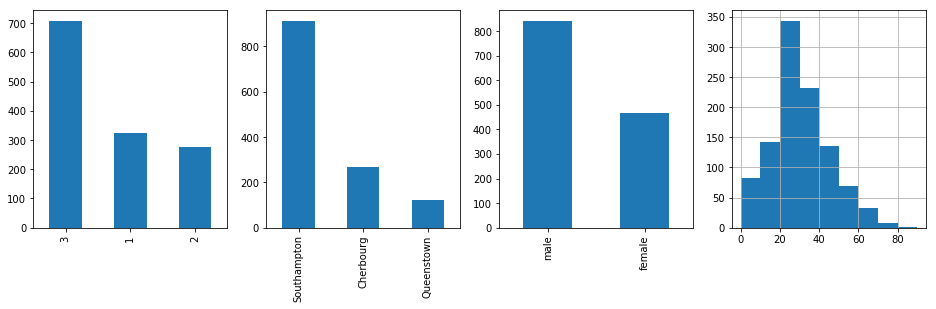

In [144]:
# 2. Miscellaneous histograms

plt.figure(figsize=(16, 4))

# Travel class
plt.subplot(141)
tc = titanic.pclass.value_counts().plot(kind='bar')

# Embarkation point
titanic.embarked.replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'], inplace=True)
plt.subplot(142)
em = titanic.embarked.value_counts().plot(kind='bar')

# Sex 
plt.subplot(143)
sx = titanic.sex.value_counts().plot(kind='bar')

# Age
plt.subplot(144)
ae = titanic.age.hist(bins=np.arange(0, 100, 10))

In [ ]:
# 3. Cabin floor allocation

titanic.cabin.dropna().map(lambda cf: str(cf)[0]).value_counts().plot.pie(autopct='%.1f%%', pctdistance=1.1, labeldistance=1.3)

([<matplotlib.patches.Wedge at 0x113c8a860>,
  <matplotlib.text.Text at 0x113c90c50>])

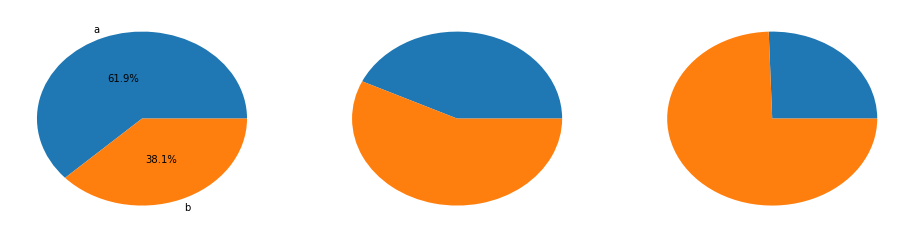

In [171]:
# 4. Survivors per cabin floor

sv = titanic[['pclass', 'survived']].groupby('pclass').mean()
plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.pie([sv.iloc[0], 1 - sv.iloc[0]], labels=['a', 'b'], autopct='%.1f%%', pctdistance=0.5, labeldistance=1.1)

plt.subplot(132)
plt.pie([sv.iloc[1], 1 - sv.iloc[1]])

plt.subplot(133)
plt.pie([sv.iloc[2], 1 - sv.iloc[2]])

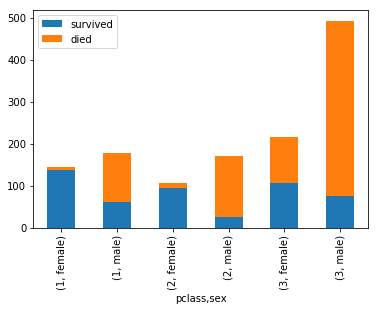

In [53]:
sv = titanic[['survived', 'pclass', 'sex']].groupby(['pclass', 'sex']).sum()
st = titanic[['pclass', 'sex']].groupby(['pclass', 'sex']).size()
sv['died'] = st-sv.survived
sv.plot.bar(stacked=True)

In [173]:
cat = titanic.sort_values('age')[['age', 'survived', 'sex', 'pclass']].dropna()
cat['cat'] = pd.Categorical(['young'] * 523 + ['old'] * 523, ordered=True)
cat = cat[['cat', 'survived', 'pclass', 'sex']]
cat.groupby(['pclass', 'sex', 'cat']).mean()

survived
pclass sex    cat            
1      female old    0.967391
              young  0.951220
       male   old    0.314050
              young  0.500000
2      female old    0.880000
              young  0.905660
       male   old    0.080460
              young  0.225352
3      female old    0.363636
              young  0.518519
       male   old    0.139535
              young  0.186364